<a href="https://colab.research.google.com/github/Gprieto88/datasci_7_geospatial/blob/main/geocoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install load_dotenv

In [37]:
import requests
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import urllib.parse
import os
from dotenv import load_dotenv
import json

load_dotenv()

False

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK7/assignment7_slim_hospital_addresses.csv')

In [39]:
df

,NAME,ADDRESS,CITY,STATE
0,ANDALUSIA HEALTH,"849 SOUTH THREE NOTCH STREET, PO BOX 760",ANDALUSIA,AL
1,ATHENS LIMESTONE HOSPITAL,700 WEST MARKET STREET,ATHENS,AL
2,ATMORE COMMUNITY HOSPITAL,401 MEDICAL PARK DR,ATMORE,AL
3,BAPTIST MEDICAL CENTER EAST,"400 TAYLOR ROAD, PO BOX 241267",MONTGOMERY,AL
4,BAPTIST MEDICAL CENTER SOUTH,"2105 EAST SOUTH BOULEVARD, PO BOX 11010",MONTGOMERY,AL
...,...,...,...,...
8008,UNIVERSITY HOSPITAL,97 SUNFIELD AVENUE,EDISON,NJ
8009,CHILDREN'S HOSPITAL OF COLORADO - COLORADO SPR...,4090 BRIARGATE PARKWAY,COLORADO SPRINGS,CO
8010,OCHSNER MEDICAL COMPLEX IBERVILLE,25455 LA-1,PLAQUEMINE,LA
8011,MERCY HEALTH FOUNTIAN MEDICAL CAMPUS,100 W MCCREIGHT AVE,SPRINGFIELD,OH


In [42]:
ADDRESS = df['ADDRESS'].sample(100)
ADDRESS

6973                707 S UNIVERSITY AVE
851                   16237 VENTURA BLVD
5641                910 BLACKFORD STREET
5810                   403 TREELINE PARK
3011                736 CAMBRIDGE STREET
                      ...               
4099        4701 MONTGOMERY BOULEVARD NE
4292              2475 ST RAYMOND AVENUE
6535              1310 24TH AVENUE SOUTH
1296                2815 S SEACREST BLVD
5268    PDA 20 C/ SAN RAFAEL, SUITE 1395
Name: ADDRESS, Length: 100, dtype: object

#First Geospatial Dataset


In [49]:
Discharge = pd.read_csv('Hospitalization_Discharge_Rates.csv')
Discharge

,OBJECTID,ZIP,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length,SHAPE_Area
0,1,60002,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0,215525.155184,1.149062e+09
1,2,60010,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0,178637.109618,8.027354e+08
2,3,60015,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0,111400.890558,3.674576e+08
3,4,60020,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0,92363.084625,1.666177e+08
4,5,60030,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0,247258.224672,8.455179e+08
5,6,60031,240.857947,234.704641,178.445851,60.977830,31.854090,29.123739,20.239979,8939.144091,598.628692,962.552743,0,163995.181561,5.271176e+08
6,7,60035,129.593011,256.951660,245.779848,25.992225,14.691258,19.211645,18.579208,10150.264976,688.323223,959.658589,0,115796.723820,3.457929e+08
7,8,60040,123.456790,308.641975,320.987654,18.072289,6.024096,6.024096,12.860082,9593.675308,685.185185,1037.037037,0,25907.372467,1.780943e+07
8,9,60042,261.025401,374.006545,214.274583,89.011167,16.183849,56.643470,13.879149,9951.332561,743.630201,1351.877825,0,45385.395226,4.517757e+07
9,10,60044,182.450343,230.644773,289.166581,35.961815,26.154047,22.884791,12.992508,9021.992500,575.751317,1025.852869,0,92539.708731,2.127777e+08


<Axes: xlabel='Asthma'>

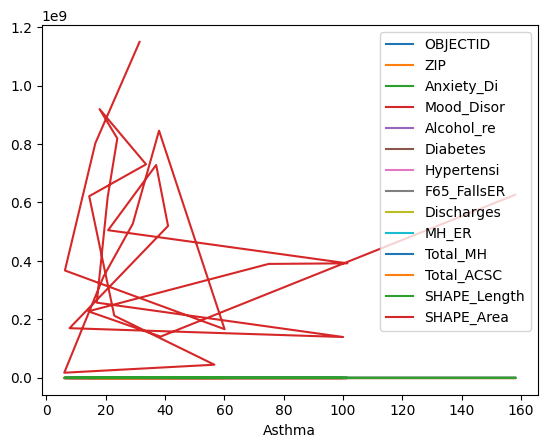

In [56]:
Discharge.plot('Asthma', legend=True)

# Second Geospatial Dataset

In [51]:
Obesity =pd.read_csv('National_Obesity_By_State.csv')
Obesity

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area
0,1,Texas,32.4,1.540832e+07,7.672329e+12
1,2,California,24.2,1.451870e+07,5.327809e+12
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12
3,4,Georgia,30.7,5.795596e+06,1.652980e+12
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12
5,6,Oregon,30.1,7.976011e+06,3.178446e+12
6,7,Virginia,29.2,7.710804e+06,1.158804e+12
7,8,Tennessee,33.8,6.350377e+06,1.177054e+12
8,9,Louisiana,36.2,7.383857e+06,1.355094e+12
9,10,New York,25.0,7.981383e+06,1.411441e+12


<Axes: xlabel='Obesity'>

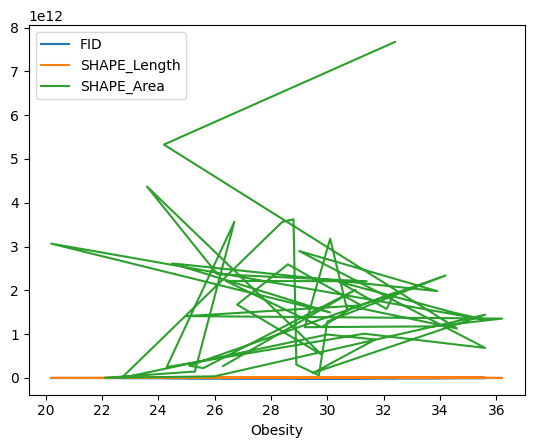

In [61]:
Obesity.plot('Obesity', legend=True)

# Third Geospatial Dataset


In [53]:
Names =pd.read_csv('Popular_Baby_Names.csv')
Names

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
57577,2014,MALE,WHITE NON HISPANIC,Yousef,18,94
57578,2014,MALE,WHITE NON HISPANIC,Youssef,24,88
57579,2014,MALE,WHITE NON HISPANIC,Yusuf,16,96
57580,2014,MALE,WHITE NON HISPANIC,Zachary,90,39


<Axes: xlabel='Gender'>

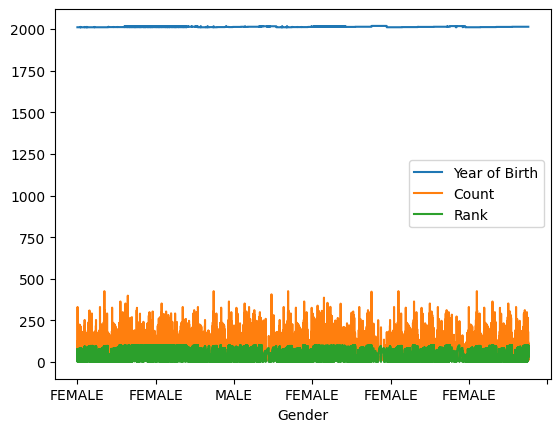

In [62]:
Names.plot('Gender', legend=True)

# Fourth Geospatial Dataset

In [54]:
Walkability =pd.read_csv('Walkability_Index.csv')
Walkability

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3.0,10.0,12.0,14.0,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1.0,1.0,7.0,17.0,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16.0,10.0,17.0,17.0,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62599,62600,1.203300e+11,1.203300e+11,12,33,2804,1,426.0,"Pensacola-Ferry Pass, FL-AL",37860.0,...,0.494521,0.009216,0.395776,14.0,8.0,8.0,17.0,12.000000,6200.001548,2.208974e+06
62600,62601,1.203300e+11,1.203300e+11,12,33,3503,4,426.0,"Pensacola-Ferry Pass, FL-AL",37860.0,...,0.269009,0.008045,0.345480,13.0,6.0,8.0,16.0,11.166667,8295.755486,3.276995e+06
62601,62602,1.201110e+11,1.201110e+11,12,11,60306,1,370.0,"Miami-Port St. Lucie-Fort Lauderdale, FL",33100.0,...,0.045433,0.000153,0.063177,12.0,10.0,8.0,18.0,12.333333,4653.255873,1.016268e+06
62602,62603,1.203300e+11,1.203300e+11,12,33,1700,1,426.0,"Pensacola-Ferry Pass, FL-AL",37860.0,...,0.557476,0.014286,0.613483,20.0,17.0,10.0,19.0,15.833333,9238.640850,2.781993e+06


<Axes: xlabel='COUNTYFP'>

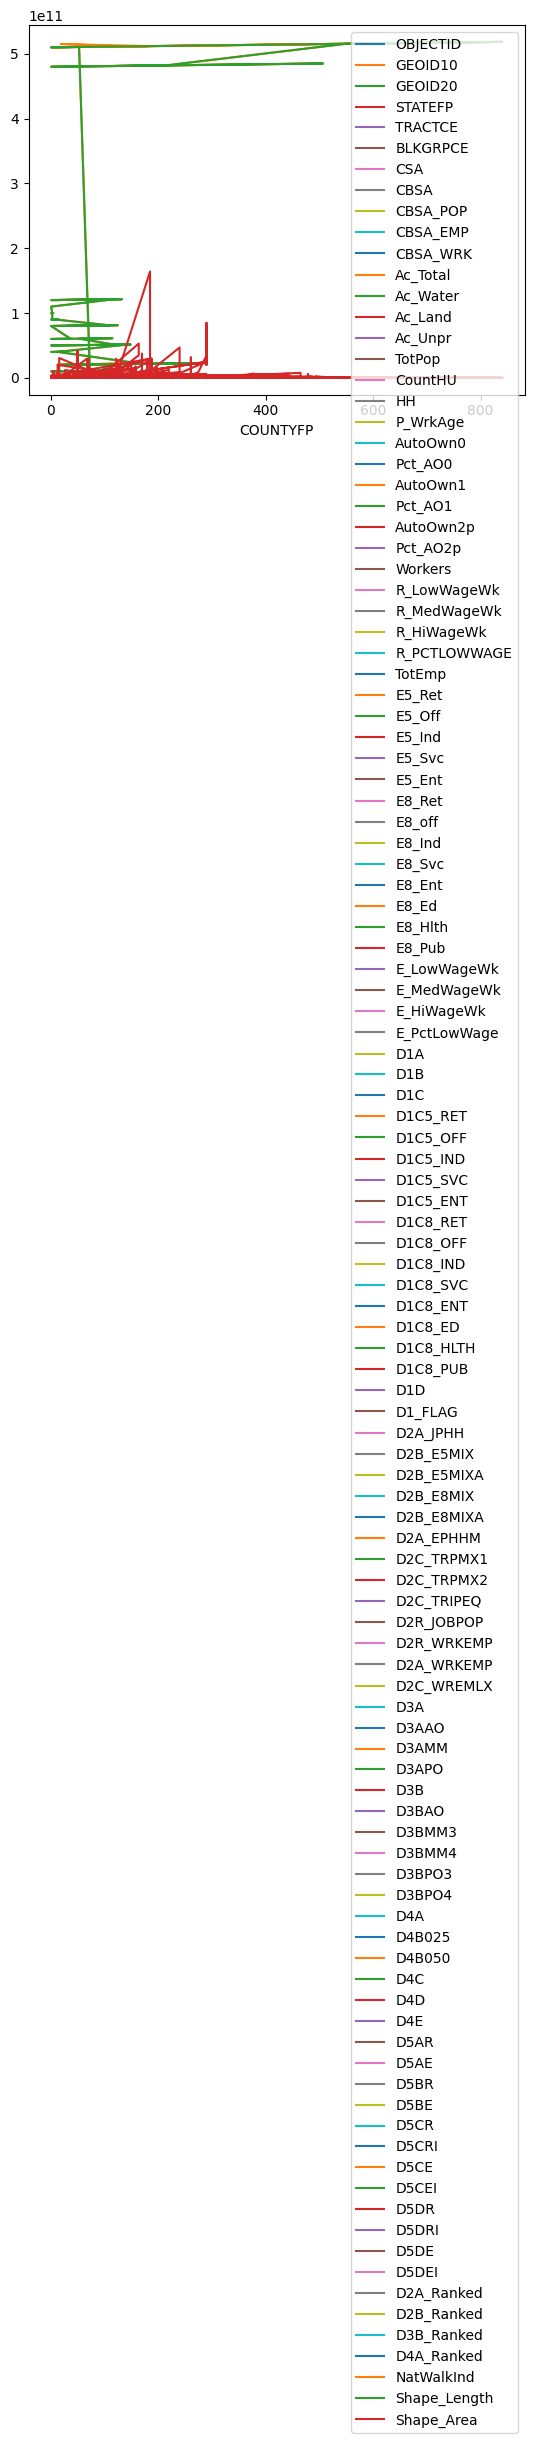

In [65]:
Walkability.plot('COUNTYFP', legend=True)

# Fifth Geospatial Dataset

In [55]:
Demographics =pd.read_csv('Demographics.csv')
Demographics

,FID,ZIP,Total_Pop,White__,African_Am,Asian__,Hispanic_o,No_English,Under_5yea,Under_18ye,...,Female_,High_Schoo,Associate_,Bachelor_D,Food_Stamp,Med_Income,No_HS,Poverty,SHAPE_Length,SHAPE_Area
0,1,60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,...,46.858671,94.3,8.2,29.3,7.528748,75928,5.7,10.5,215525.155184,1.149062e+09
1,2,60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,...,51.193264,97.2,5.4,64.3,2.462192,122789,2.8,4.9,178637.109618,8.027354e+08
2,3,60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,...,51.006466,97.6,3.5,71.5,1.739495,130140,2.5,3.5,111400.890558,3.674576e+08
3,4,60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,...,51.912942,88.9,7.9,22.7,14.162791,55431,11.2,11.2,92363.084625,1.666177e+08
4,5,60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,...,50.214698,93.8,6.2,45.5,7.104066,81055,6.2,5.5,247258.224672,8.455179e+08
5,6,60031,37920,65.886076,7.858650,10.181962,13.035338,22.6,4.7,26.6,...,51.645570,94.1,8.3,45.2,5.273717,83500,6.0,4.9,163995.181561,5.271176e+08
6,7,60035,29837,86.721185,2.279050,2.460033,7.199115,15.9,5.5,25.2,...,50.940108,96.3,3.5,69.5,2.725385,115372,3.8,6.7,115796.723820,3.457929e+08
7,8,60040,5400,48.703704,2.925926,1.759259,46.296296,55.3,7.6,23.3,...,52.074074,81.3,7.5,32.6,9.607843,54176,18.8,13.3,25907.372467,1.780943e+07
8,9,60042,8556,82.374942,0.759701,0.736325,12.727910,18.4,5.4,27.0,...,51.566152,90.4,7.9,23.1,8.375796,63792,9.7,11.4,45385.395226,4.517757e+07
9,10,60044,9683,84.426314,0.919137,7.311784,5.225653,13.6,4.1,22.6,...,52.669627,96.6,3.7,69.6,3.787879,93849,3.4,5.4,92539.708731,2.127777e+08
